In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
gasp = pd.read_csv("clean_data/clean_gasprice.csv", index_col=0)
relevstates = gasp.columns

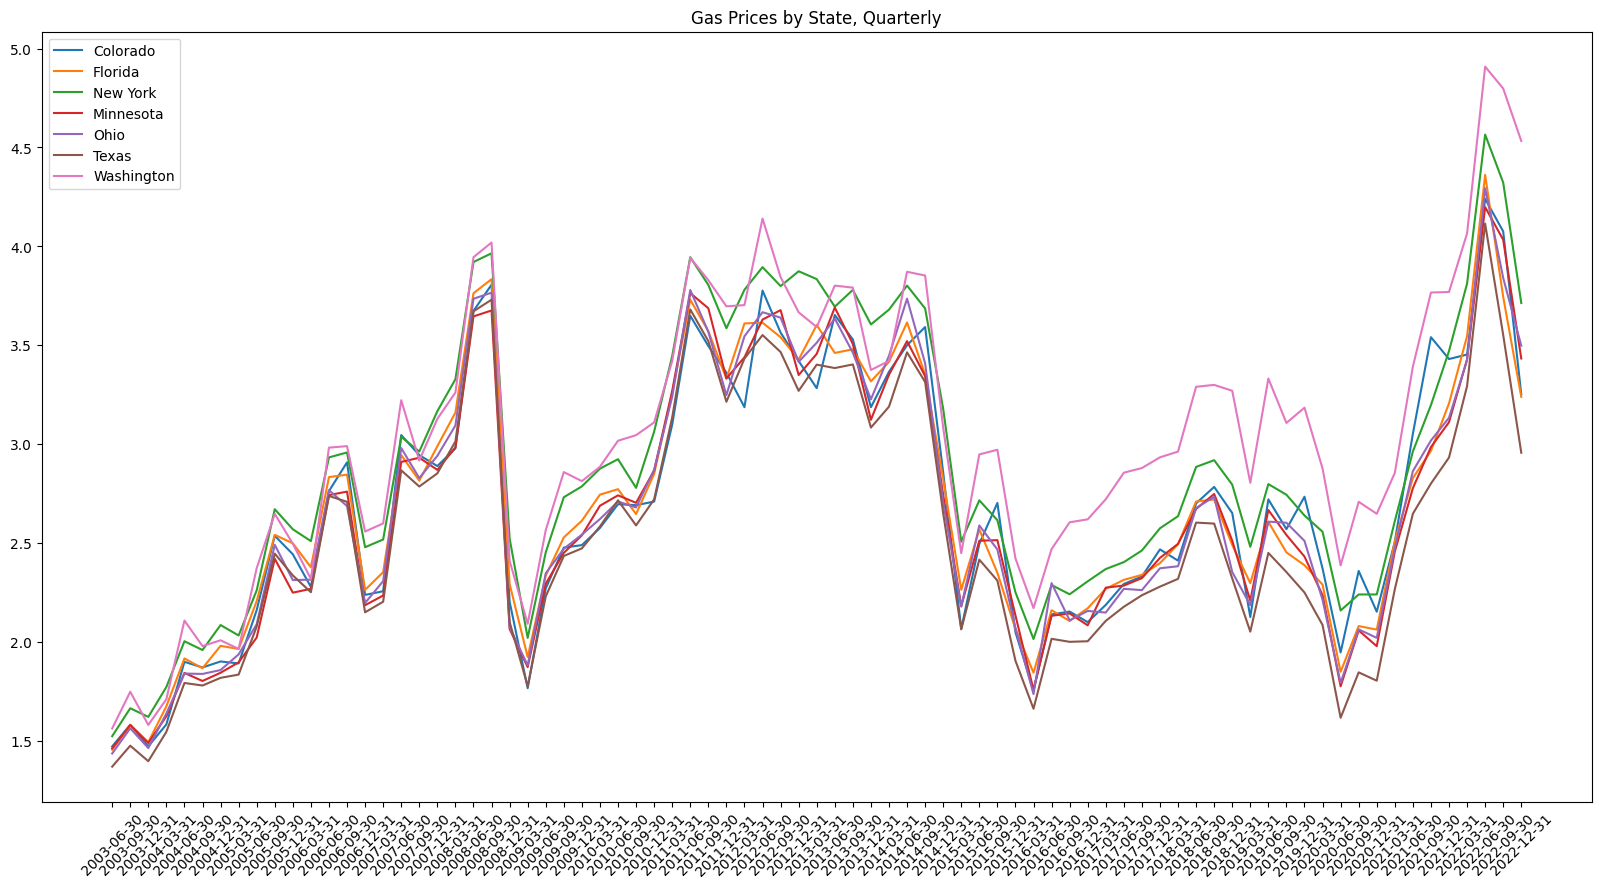

In [4]:
fig, ax = plt.subplots()
for state in relevstates:
    ax.plot(gasp[state], label=state)

plt.title("Gas Prices by State, Quarterly")

fig.set_size_inches(20,10)
ax.tick_params(axis='x', labelrotation=45)
plt.legend()


In [6]:
coal_data = pd.read_csv("clean_data/clean_coal.csv", index_col=0)
coal_data = coal_data[relevstates]
coal_data

,Colorado,Florida,New York,Minnesota,Ohio,Texas,Washington
2001-03-31,4914880.0,7088945.0,2704385.0,4638597.0,13983112.0,22164839.0,1591350.0
2001-06-30,4922308.0,7139229.0,2158794.0,3923935.0,12958471.0,22952510.0,1045910.0
2001-09-30,5115914.0,7908980.0,2422484.0,4966348.0,14118895.0,25962808.0,1610860.0
2001-12-31,4811871.0,6559143.0,1972100.0,4898373.0,12773692.0,21357650.0,1753290.0
2002-03-31,4672570.0,6451904.0,1964770.0,4909242.0,13311712.0,21917084.0,1763681.0
...,...,...,...,...,...,...,...
2021-09-30,3774366.0,2516828.0,0.0,3102777.0,6092092.0,19316746.0,809073.0
2021-12-31,3143811.0,1269023.0,0.0,2046249.0,3978655.0,13800307.0,576443.0
2022-03-31,2932684.0,1567385.0,0.0,2874541.0,5409033.0,14138528.0,707601.0
2022-06-30,2568333.0,1975682.0,0.0,1350839.0,3720293.0,14319553.0,196957.0


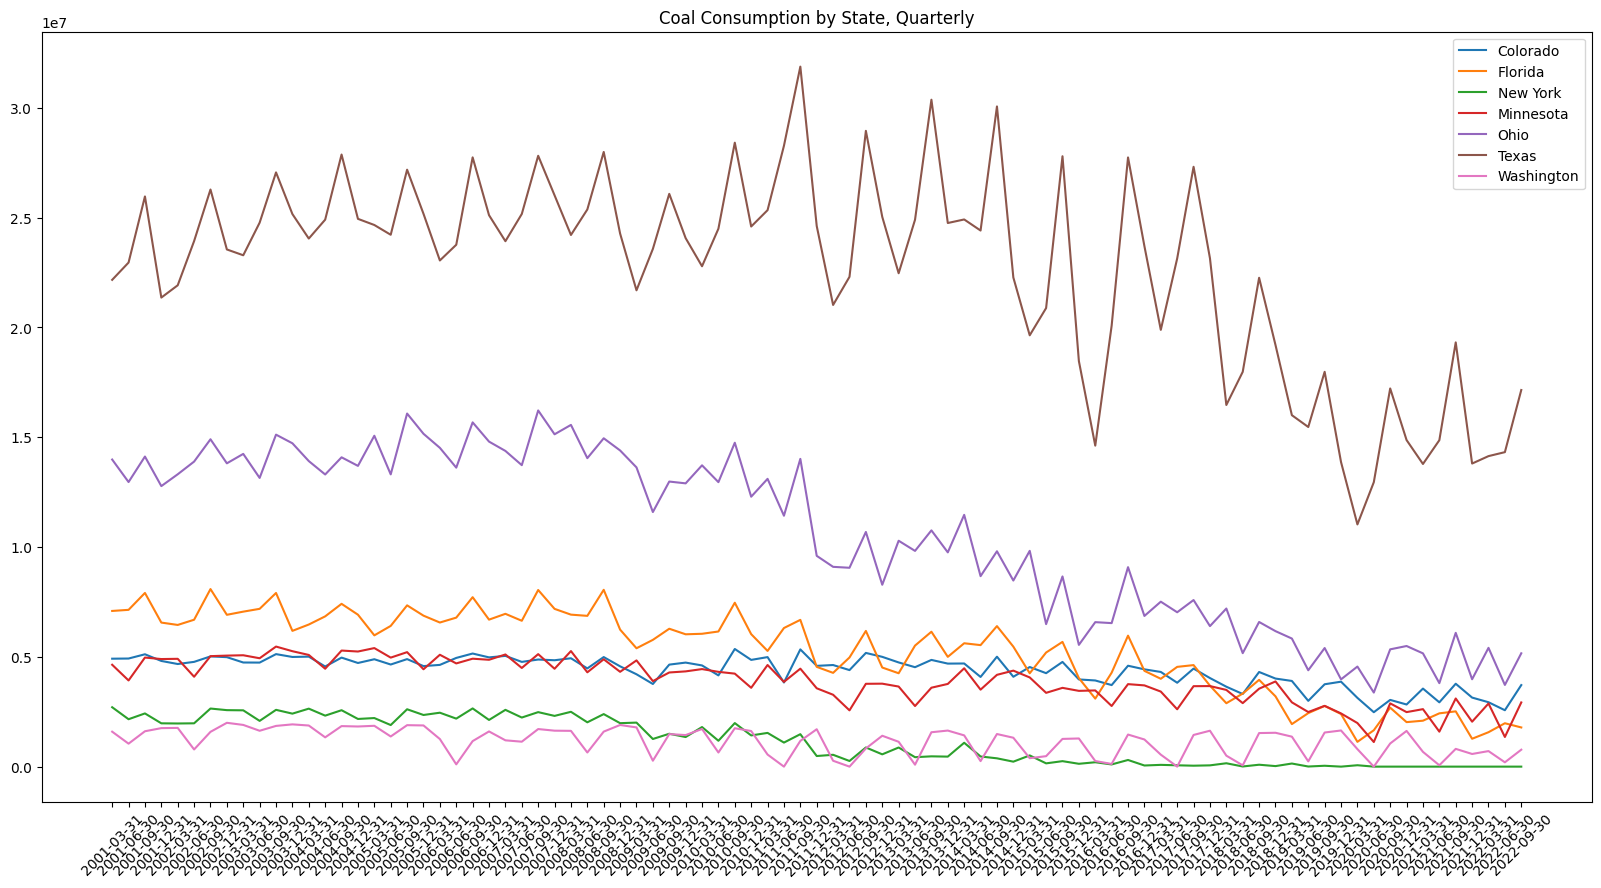

In [7]:
fig, ax = plt.subplots()
for state in relevstates:
    ax.plot(coal_data[state], label=state)

plt.title("Coal Consumption by State, Quarterly")

fig.set_size_inches(20,10)
ax.tick_params(axis='x', labelrotation=45)
plt.legend()

In [16]:
import os
genfiles = pd.Series(os.listdir("clean_data"))
genfiles = genfiles[genfiles.str.contains("_gen.csv")].values
genfiles

array(['clean_Wood_gen.csv', 'clean_Solar_gen.csv', 'clean_Wind_gen.csv',
       'clean_Nuclear_gen.csv', 'clean_Biomass_gen.csv',
       'clean_Hydroelectric_gen.csv', 'clean_Coal_gen.csv',
       'clean_Total_gen.csv', 'clean_Natural Gas_gen.csv'], dtype=object)

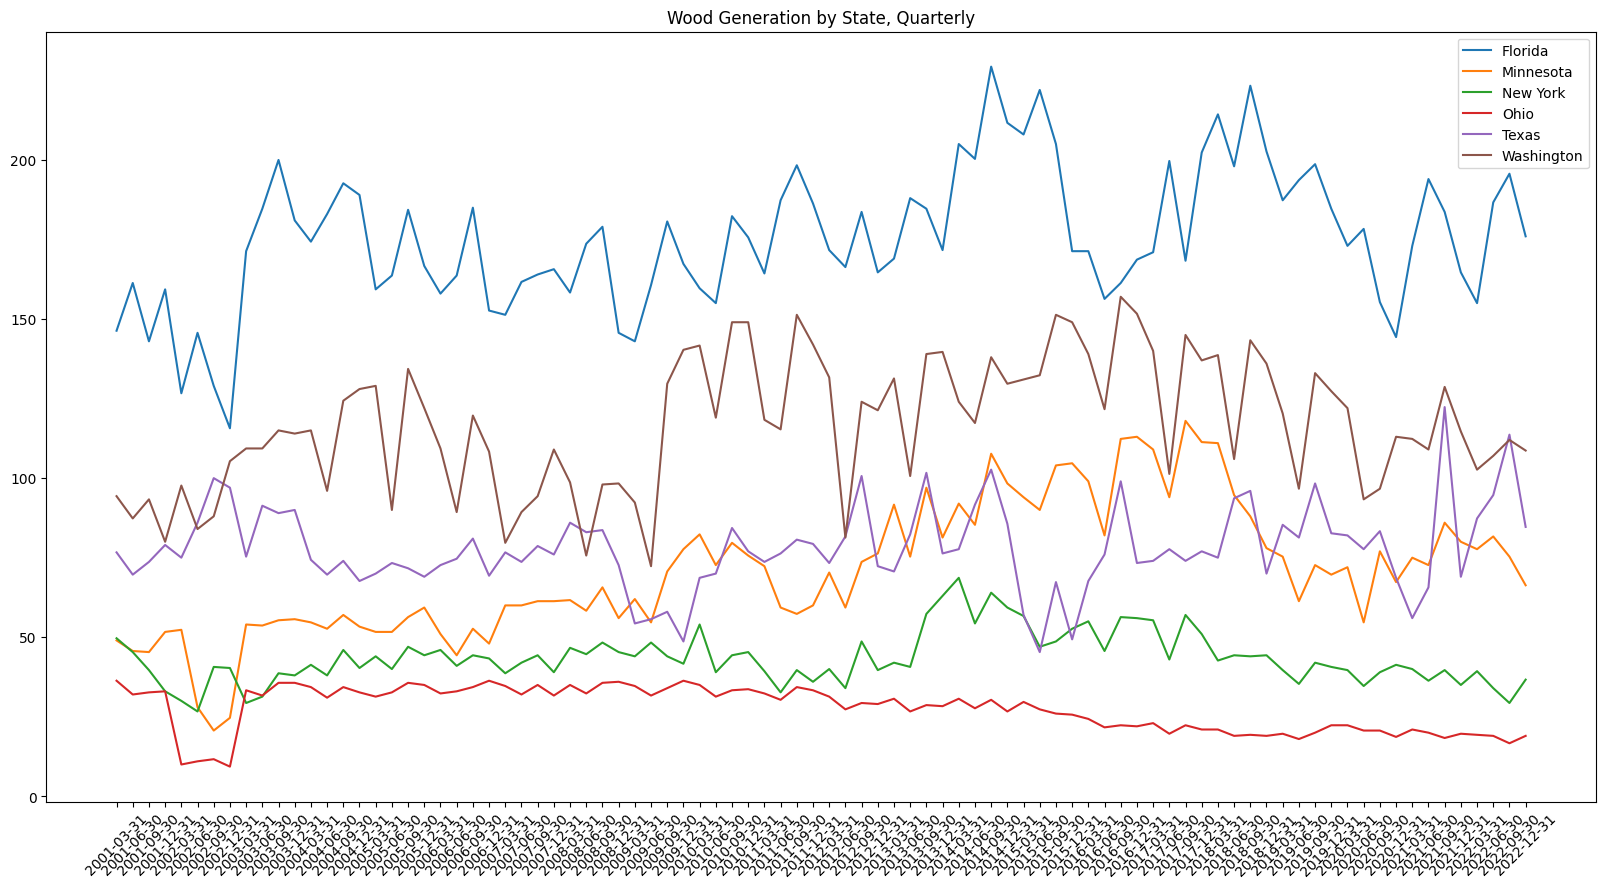

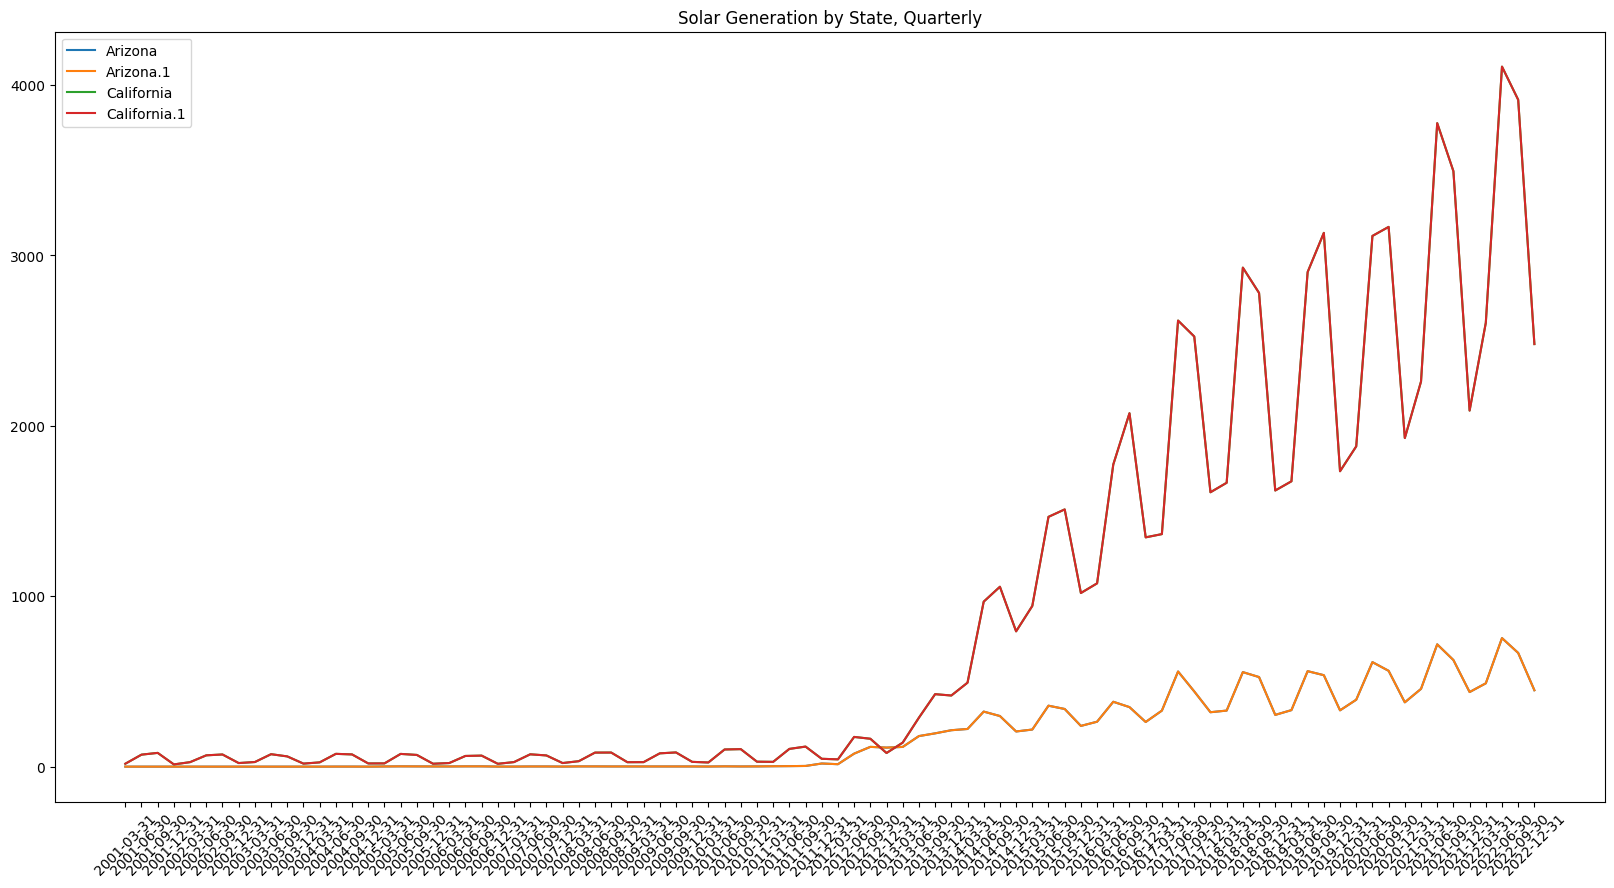

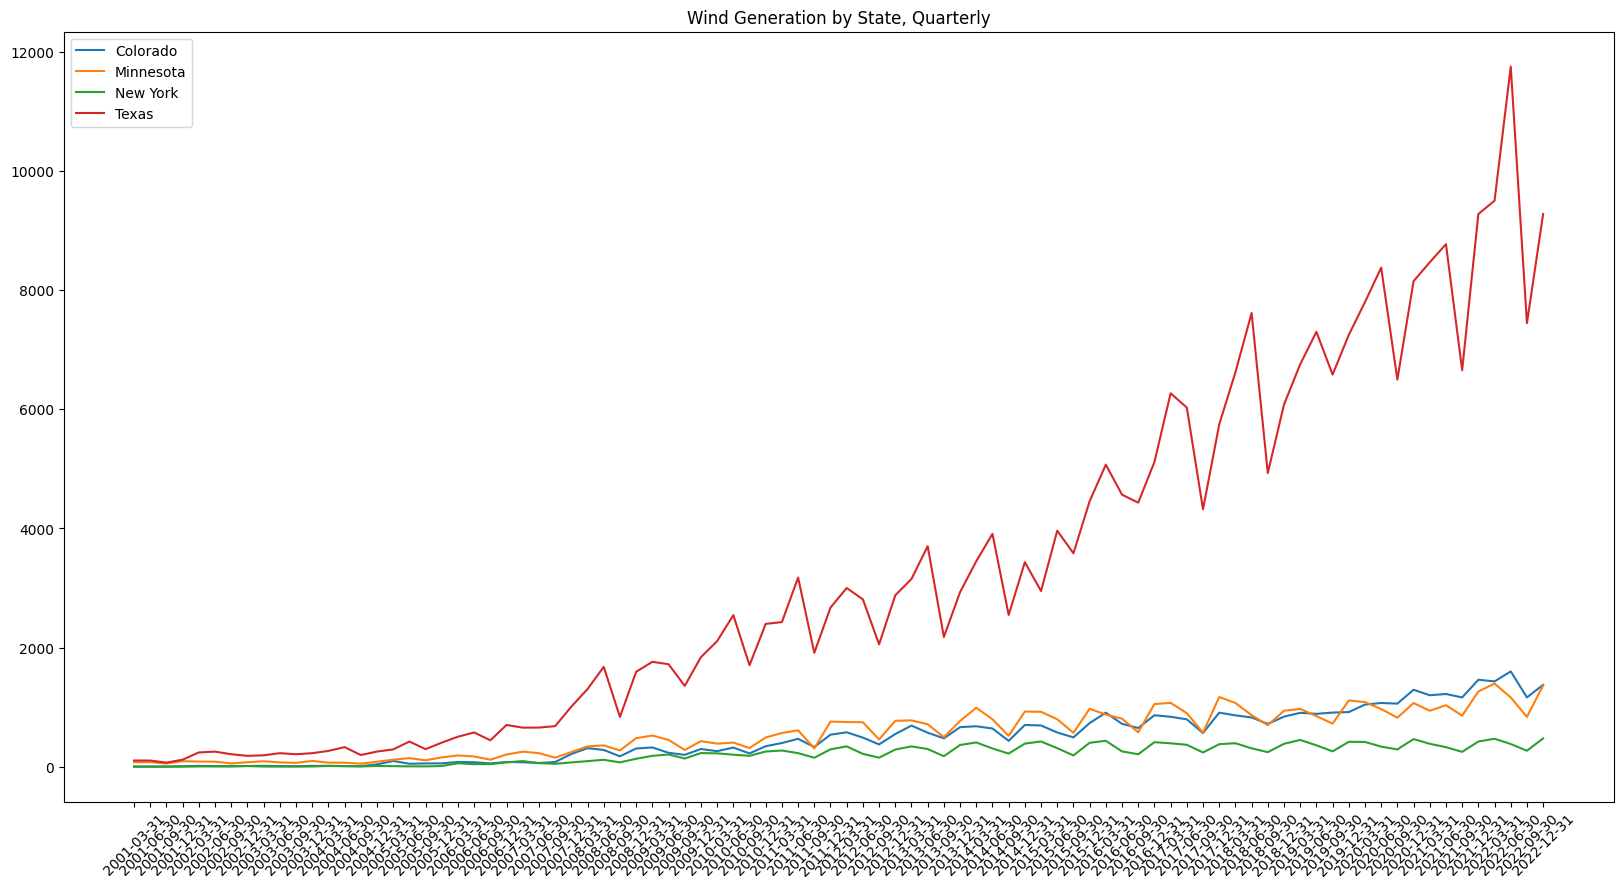

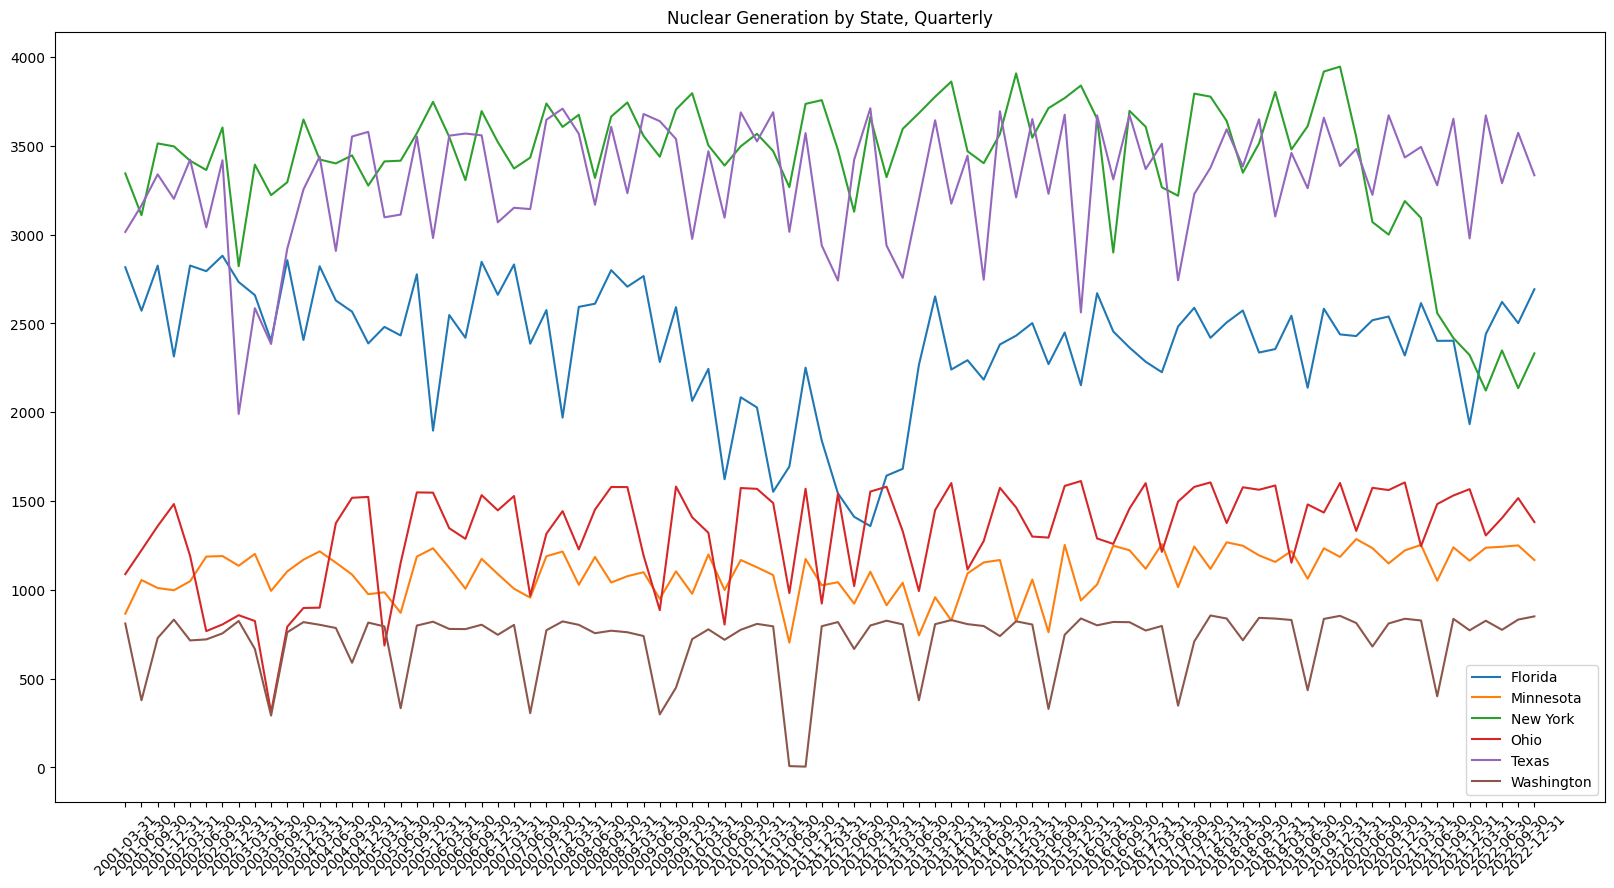

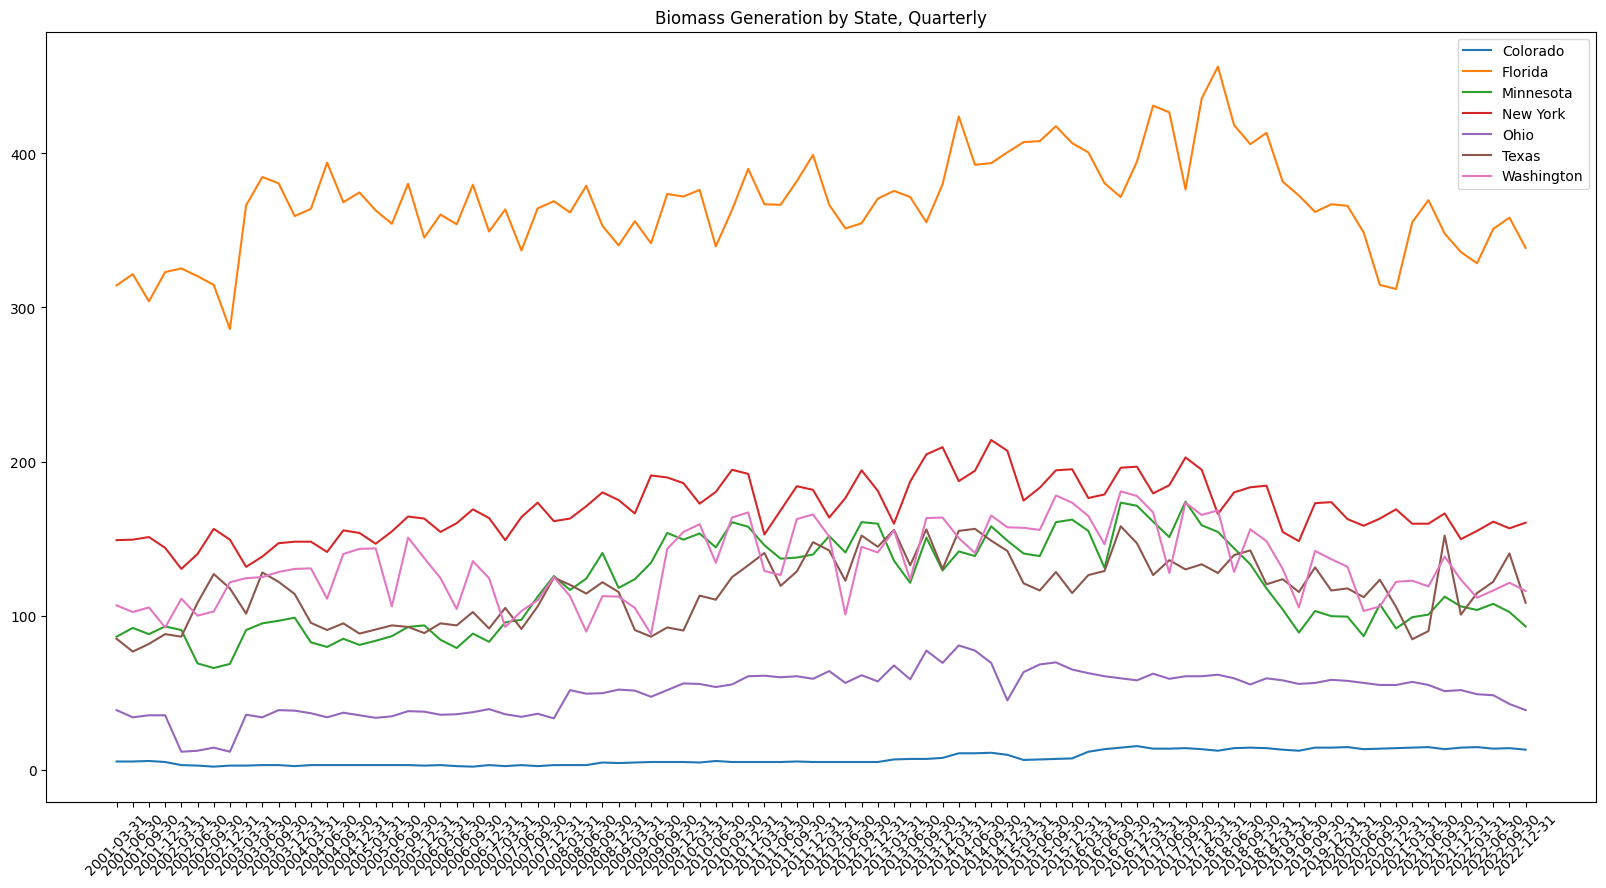

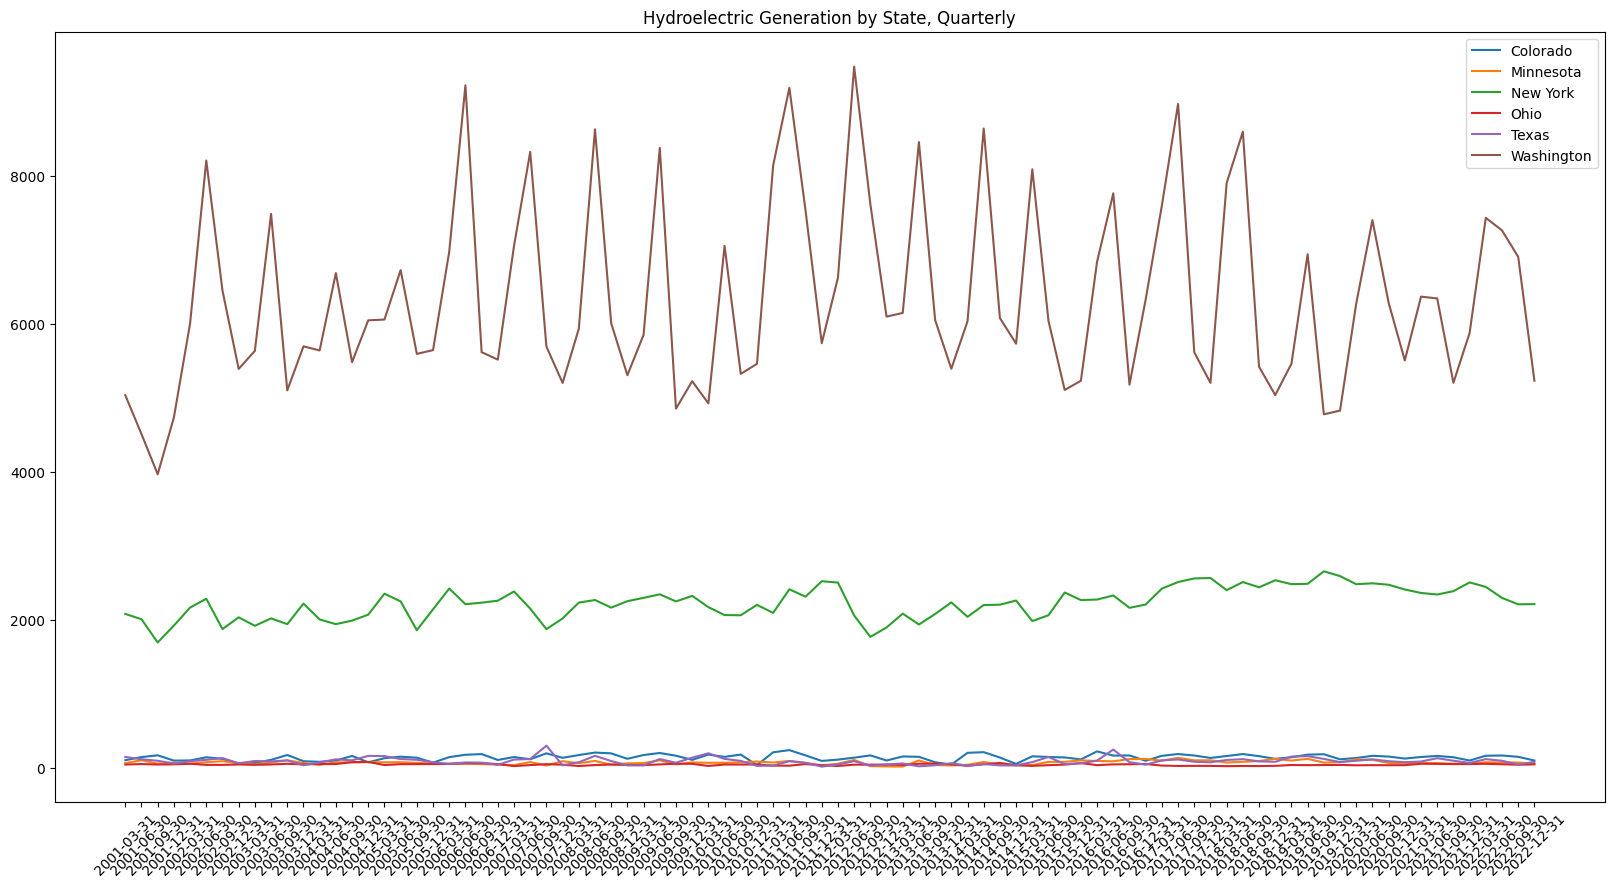

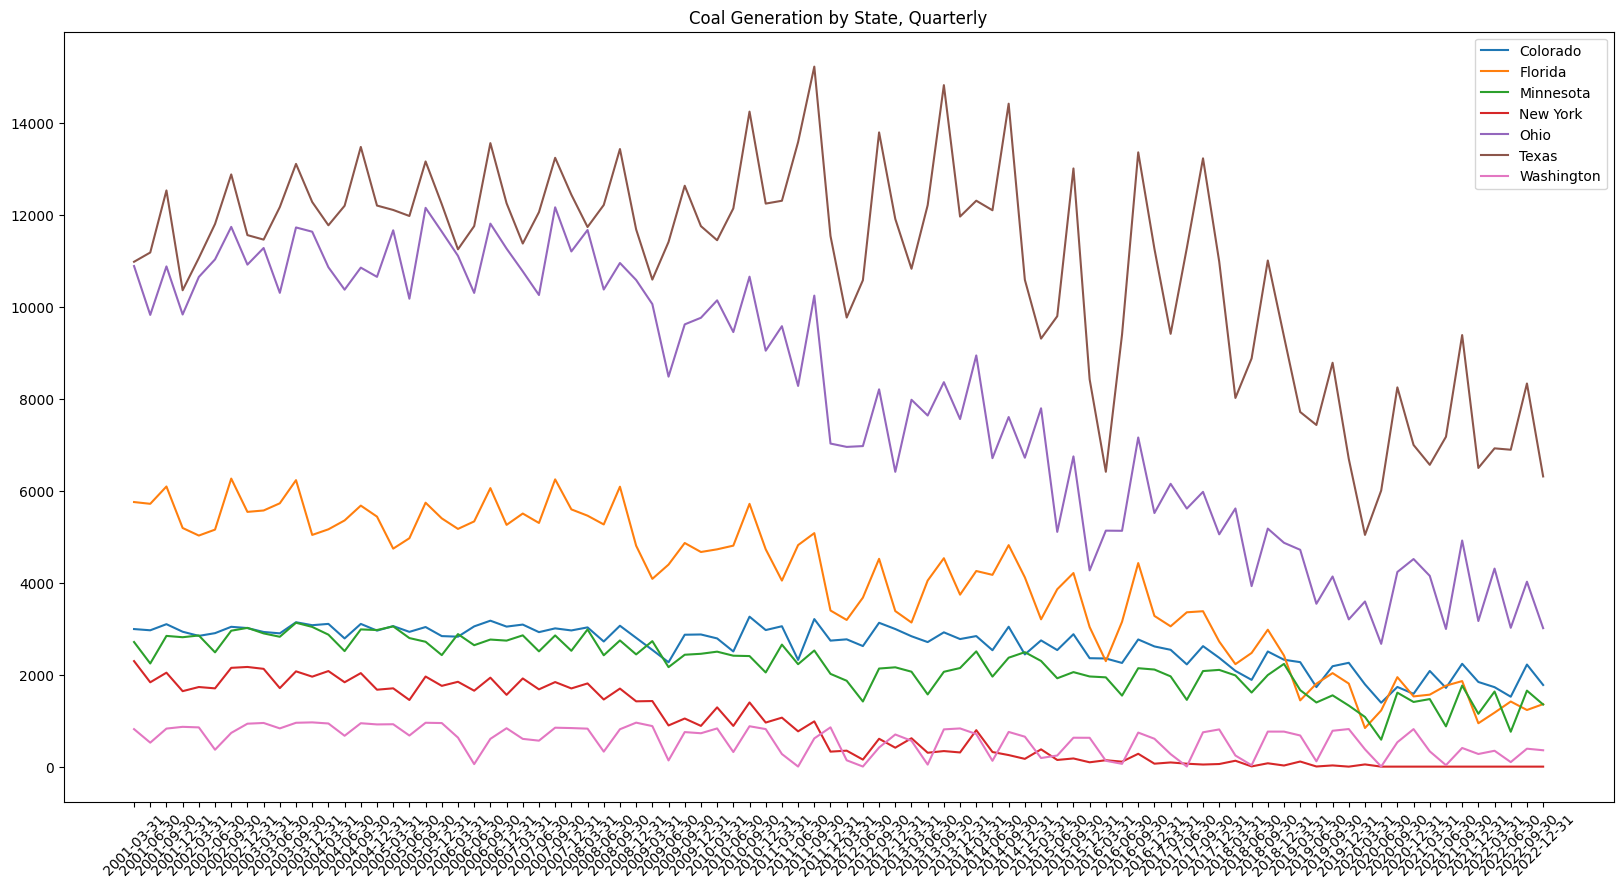

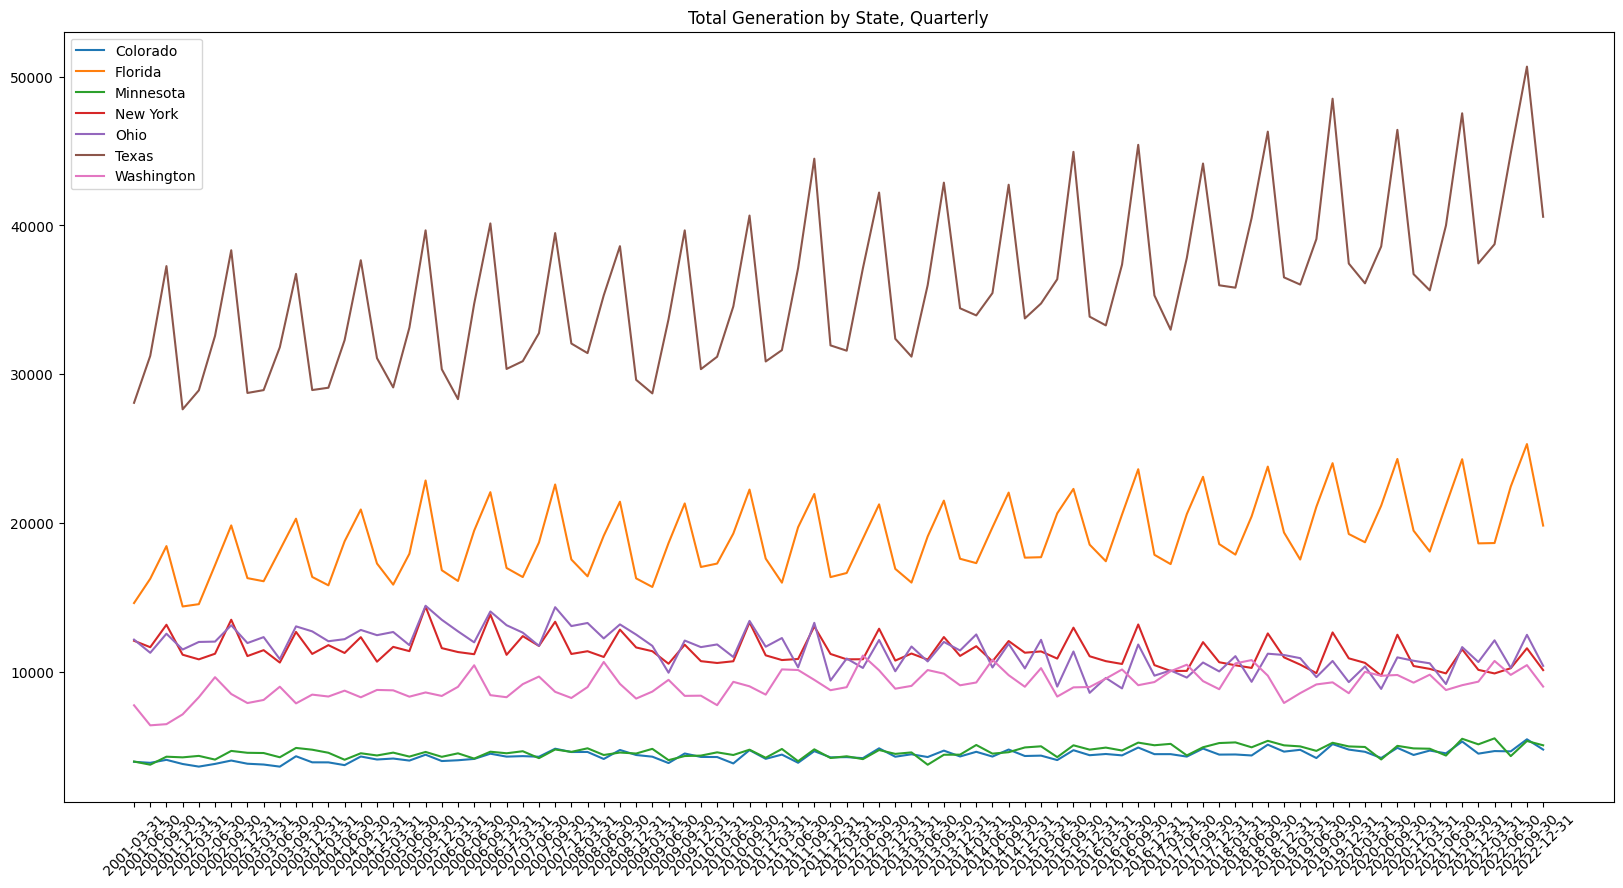

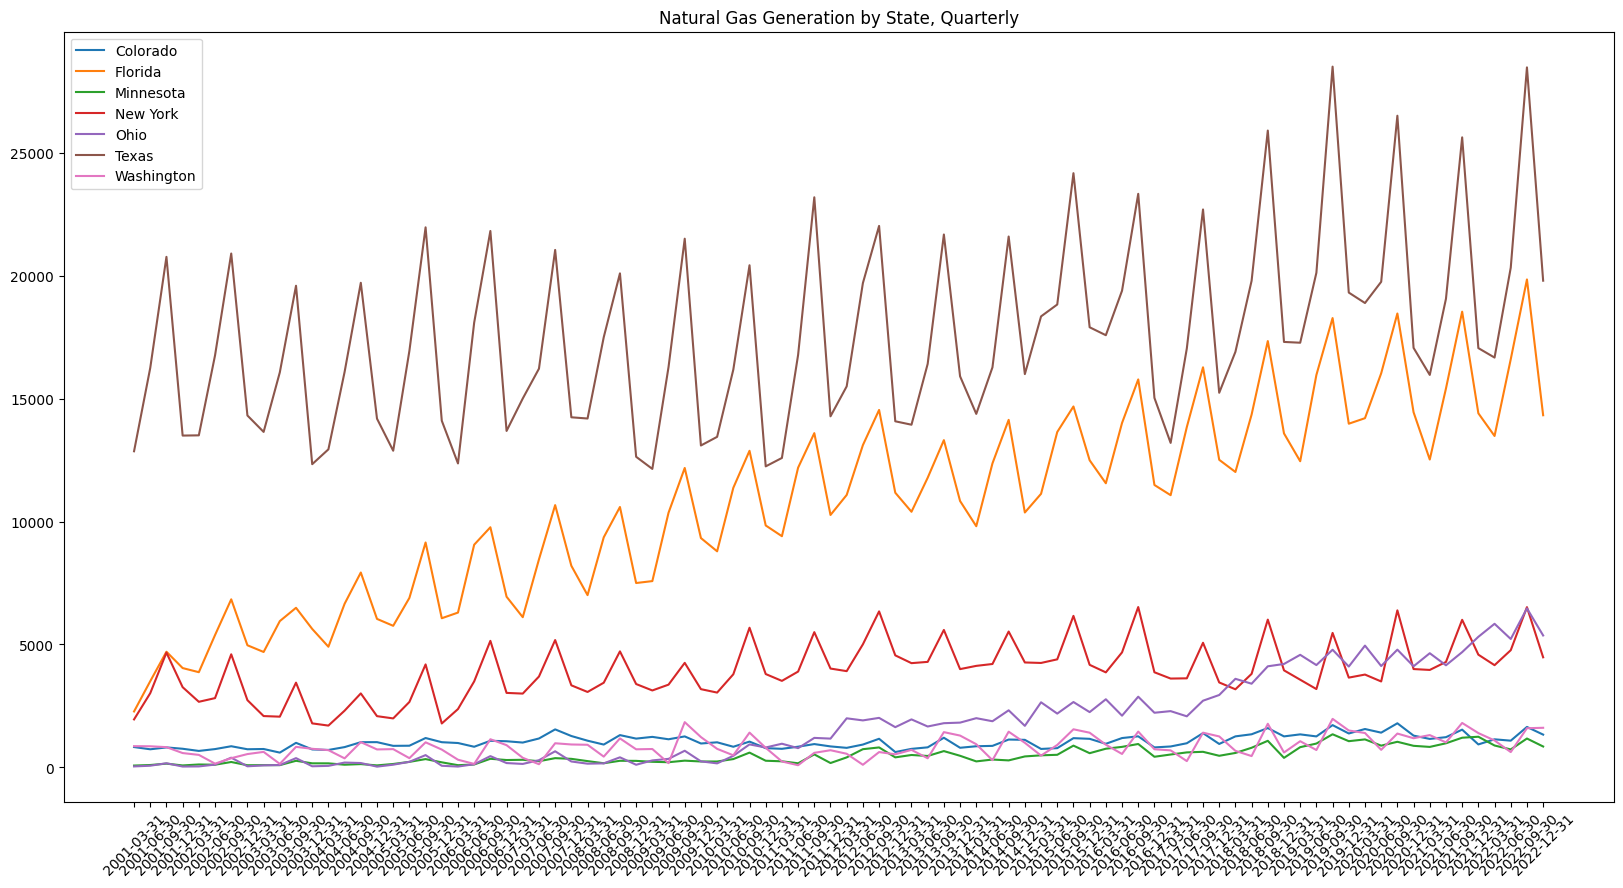

In [60]:
for i, genfile in enumerate(genfiles):

    gen_data = pd.read_csv("clean_data/" + genfile, index_col=0)
    fig, ax = plt.subplots()

    plotstates = gen_data.columns
    plotstates = plotstates[np.isin(plotstates, relevstates)]
    if len(plotstates) == 0:
        for state in gen_data.columns:
            ax.plot(gen_data[state], label=state)
    else:
        for state in plotstates:
            ax.plot(gen_data[state], label=state)
    
    name = genfile.split("_")[1]
    plt.title(name + " Generation by State, Quarterly")

    fig.set_size_inches(20,10)
    ax.tick_params(axis='x', labelrotation=45)
    plt.legend()
    plt.show()


#! the solar data is messed up, need to fix




In [ ]:
##TODO: comparisons between the states are scuffed because of the different scales, need to normalize
## do per capita by dividing by population over time

In [ ]:
# Hypothesis: states with higher gas prices will have higher coal consumption and lower renewable energy consumption
# There is a tradeoff between high cost of renewables; coal is cheaper, but has a higher environmental cost
# Using generation, I want to predict electricity sales
# Hypothesis: States that use more renewables end up using more/less electricity?
# More electricity is generated than sold
# Given time series consumption/generation of various fuels, I want to predict how much electricity is sold
# This may be slightly trivial, since you'll generate around how much demand there is


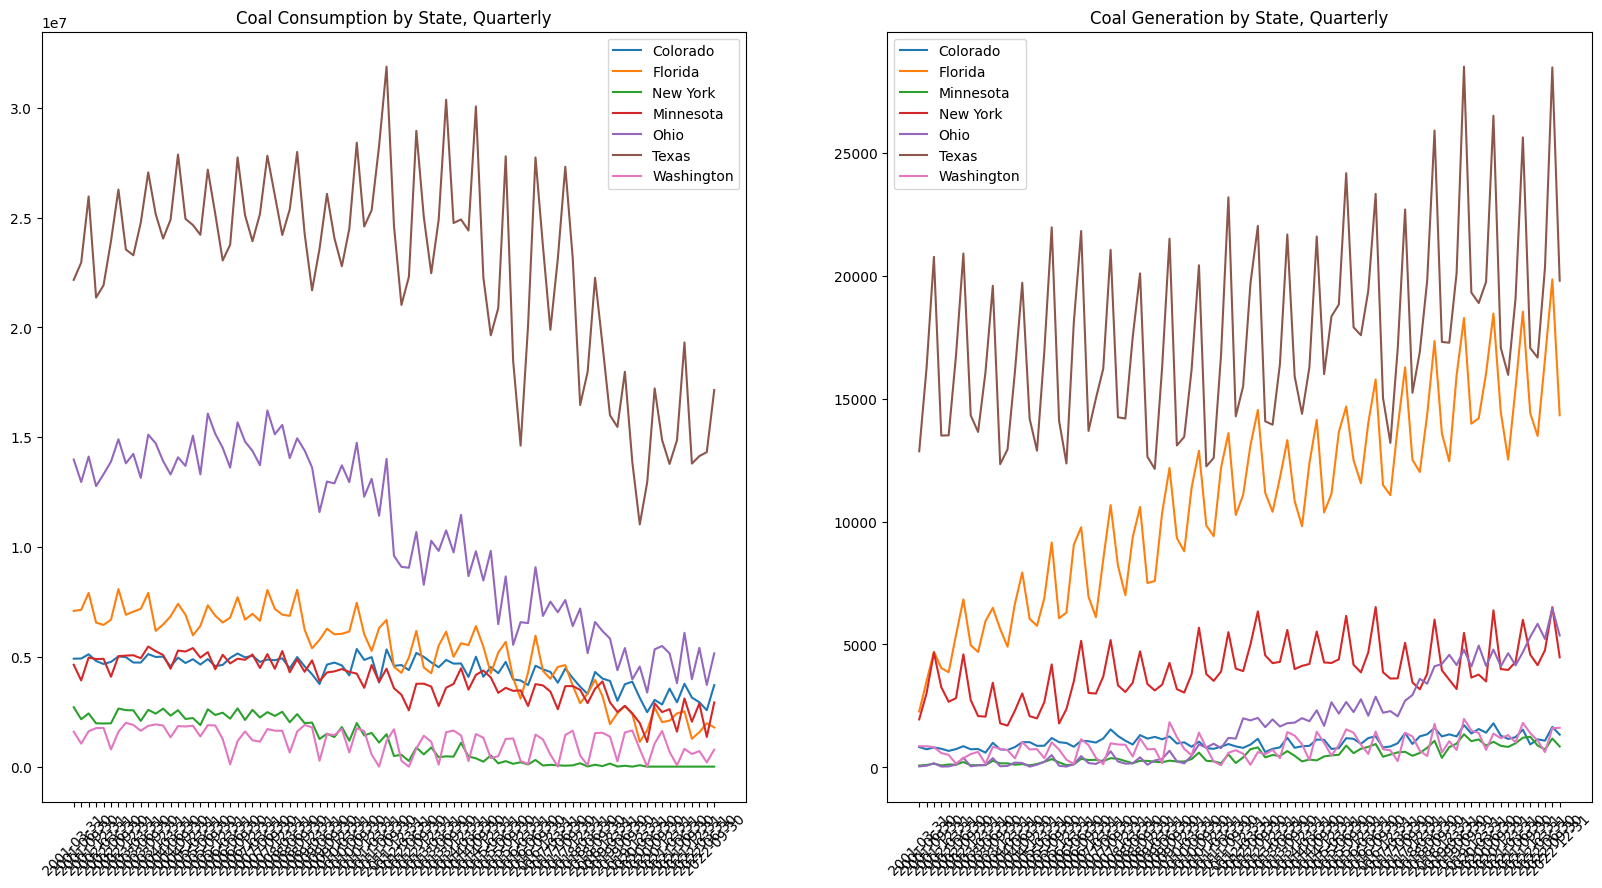

In [66]:
#Coal Consumption vs. Generation
fig, ax = plt.subplots(1,2)
for state in relevstates:
    ax[0].plot(coal_data[state], label=state)

ax[0].set_title("Coal Consumption by State, Quarterly")

ax[0].tick_params(axis='x', labelrotation=45)
ax[0].legend()


coal_gen_data = pd.read_csv("clean_data/clean_Coal_gen.csv", index_col=0)

plotstates = coal_gen_data.columns
plotstates = plotstates[np.isin(plotstates, relevstates)]
if len(plotstates) == 0:
    for state in gen_data.columns:
        ax[1].plot(gen_data[state], label=state)
else:
    for state in plotstates:
        ax[1].plot(gen_data[state], label=state)

ax[1].set_title("Coal Generation by State, Quarterly")

fig.set_size_inches(20,10)
ax[0].tick_params(axis='x', labelrotation=45)
ax[1].tick_params(axis='x', labelrotation=45)
plt.legend()
plt.show()


In [ ]:
#Ok so thats a problem. Coal consumption is going down, but coal generation is going up

In [61]:
#seasonality analysis
import statsmodels

ModuleNotFoundError: No module named 'statsmodels'